In [29]:
import colour
from colour.plotting import *

# needed to plot planckian locus on CIE1976UCS
from colour.models import (UCS_uv_to_xy, XYZ_to_UCS, UCS_to_uv, xy_to_XYZ, XYZ_to_Luv)
from colour.temperature import CCT_to_uv, CCT_to_uv_Ohno2013
from colour import SDS_ILLUMINANTS
import pylab

colour_style()

import matplotlib.pyplot as plt
import numpy as np

plt.style.use({'figure.figsize': (10.24, 5.75)})

In [30]:
def xy_to_CIE_LUV(point):
    '''
    transform from CIE 1931 x,y to CIE 1976 u',v'
    '''
    x = point[0]
    y = point[1]
    u_prime = 4 * x / (-2 * x + 12 * y + 3)
    v_prime = 9 * y / (-2 * x + 12 * y + 3)
    return (u_prime, v_prime)

In [56]:
def plot_cct_locus(**kwargs):
    settings = {
        'chromaticity': '1976 UCS',
    }
    settings.update(kwargs)
    
    start, end = 1667, 100000
    if settings['chromaticity'] == '1976 UCS':
        xy = np.array(
            [xy_to_CIE_LUV(UCS_uv_to_xy(CCT_to_uv(np.array([x, 0]))))
             for x in np.arange(start, end + 250, 250)])  # yapf: disable
    else:
        xy = np.array(
            [UCS_uv_to_xy(CCT_to_uv(np.array([x, 0])))
             for x in np.arange(start, end + 250, 250)])  # yapf: disable
    
    pylab.plot(xy[..., 0], xy[..., 1], color='black', linewidth=1)
    
    for i in (1667, 2000, 2500, 3000, 4000, 6000, 10000):
        x0, y0 = UCS_uv_to_xy(CCT_to_uv(np.array([i, -0.025])))
        x1, y1 = UCS_uv_to_xy(CCT_to_uv(np.array([i, 0.025])))
        if settings['chromaticity'] == '1976 UCS':
            (x0,y0) = xy_to_CIE_LUV([x0,y0])
            (x1,y1) = xy_to_CIE_LUV([x1,y1])
            
        pylab.plot((x0, x1), (y0, y1), color='black', linewidth=0.5)
        
        pylab.annotate(
            '{0}K'.format(i),
            xy=(x0, y0),
            xytext=(0, -8),
            color='black',
            textcoords='offset points',
            size='x-small')

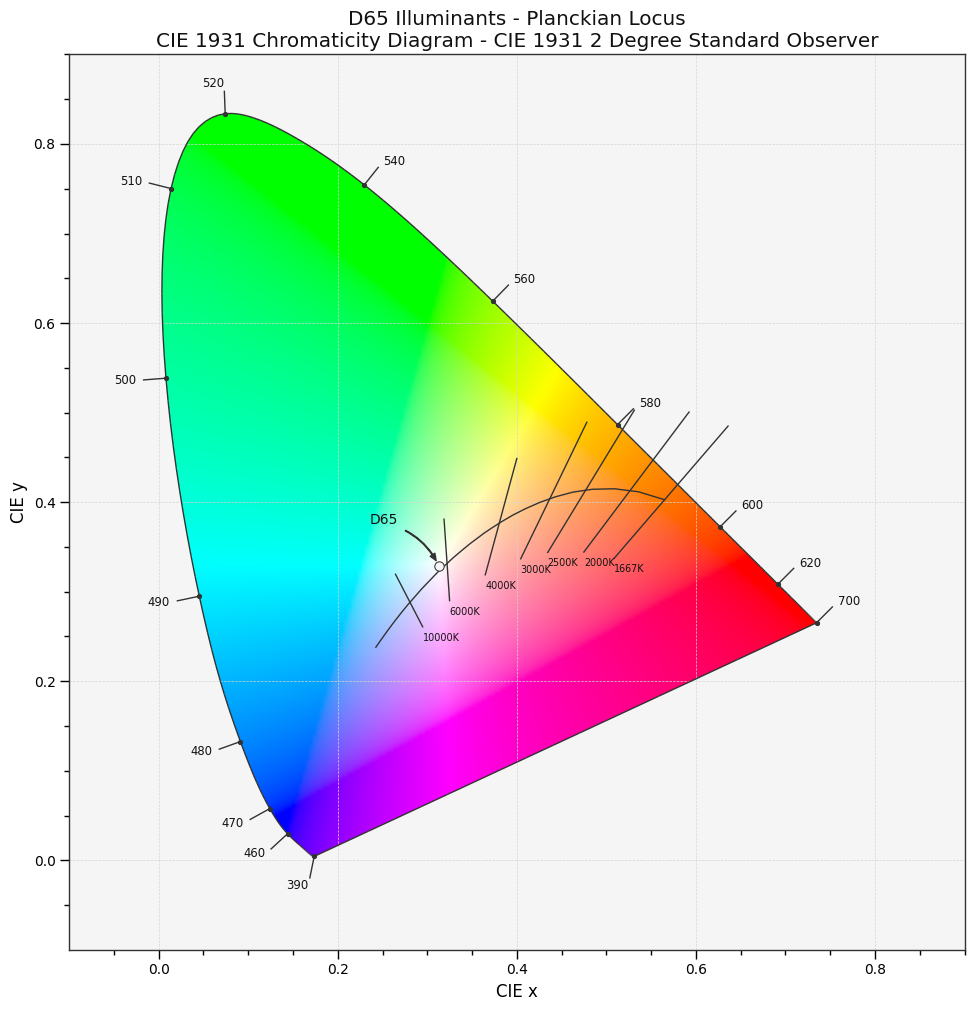

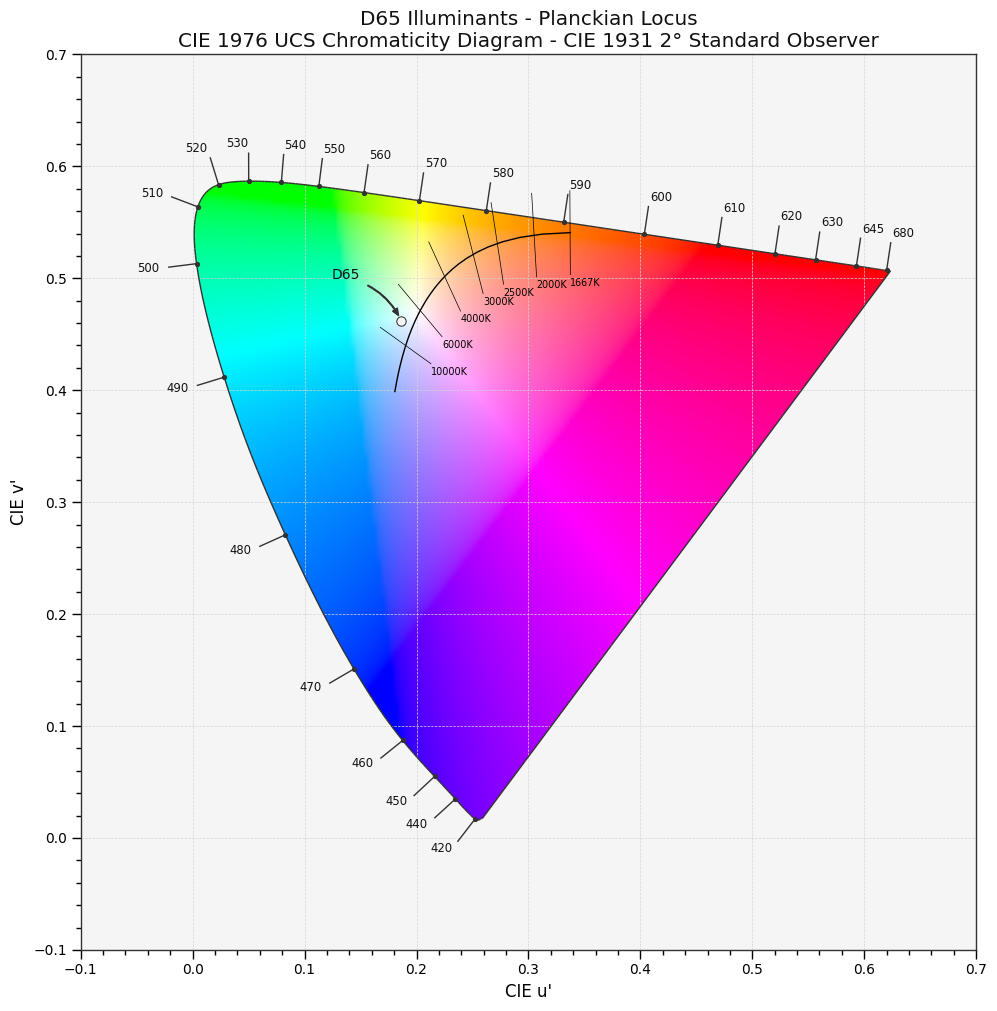

In [57]:
plot_planckian_locus_in_chromaticity_diagram_CIE1931(['d65'])

# why doesn't this exist in the package?
#plot_planckian_locus_in_chromaticity_diagram_CIE1976UCS(['d65'])

# recreate manually
plot_sds_in_chromaticity_diagram_CIE1976UCS([SDS_ILLUMINANTS['D65']],
                                            standalone=False,
                                            title='D65 Illuminants - Planckian Locus\nCIE 1976 UCS Chromaticity Diagram - CIE 1931 2° Standard Observer'
                                           )
# plot cct locus
plot_cct_locus(chromaticity='1976 UCS')
display(standalone=True)


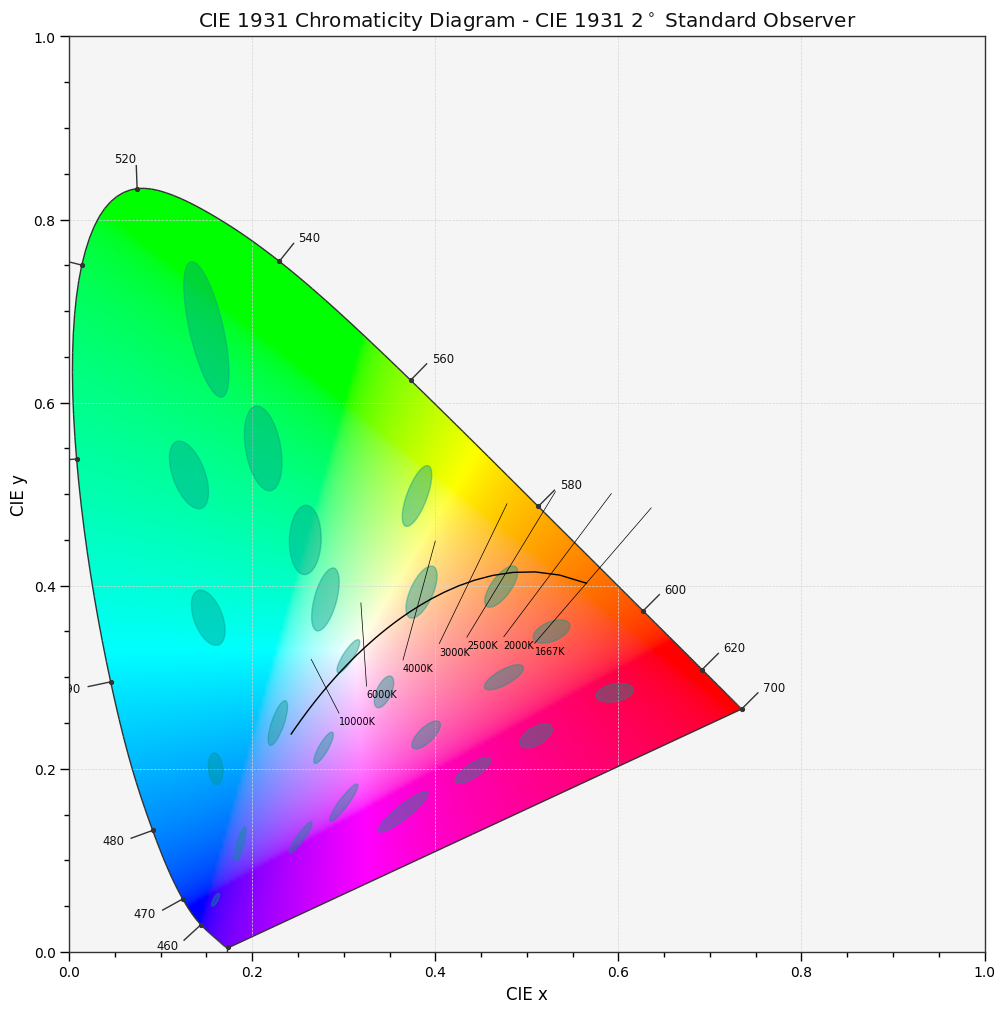

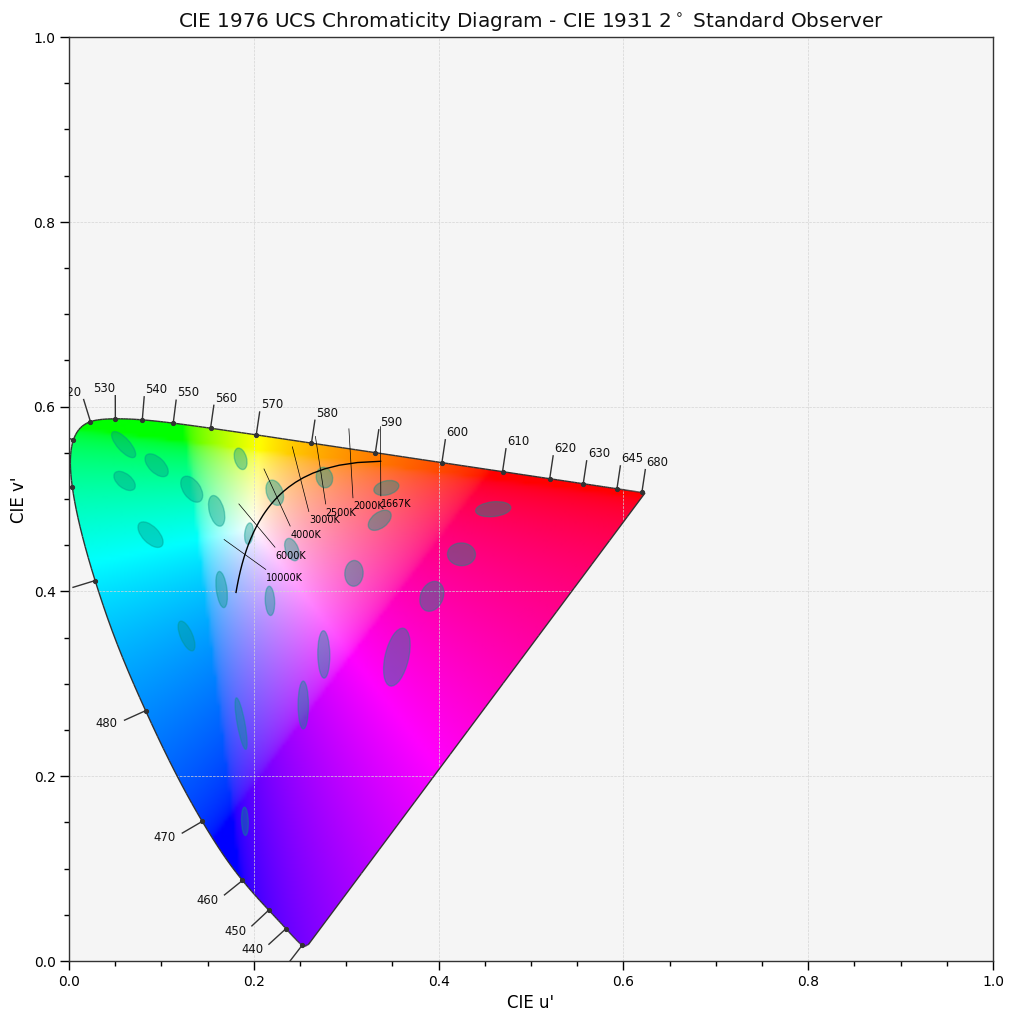

In [58]:
plot_ellipses_MacAdam1942_in_chromaticity_diagram_CIE1931(standalone=False)
plot_cct_locus(chromaticity='1931')
display(standalone=True)

plot_ellipses_MacAdam1942_in_chromaticity_diagram_CIE1976UCS(standalone=False)
plot_cct_locus(chromaticity='1976 UCS')
display(standalone=True)

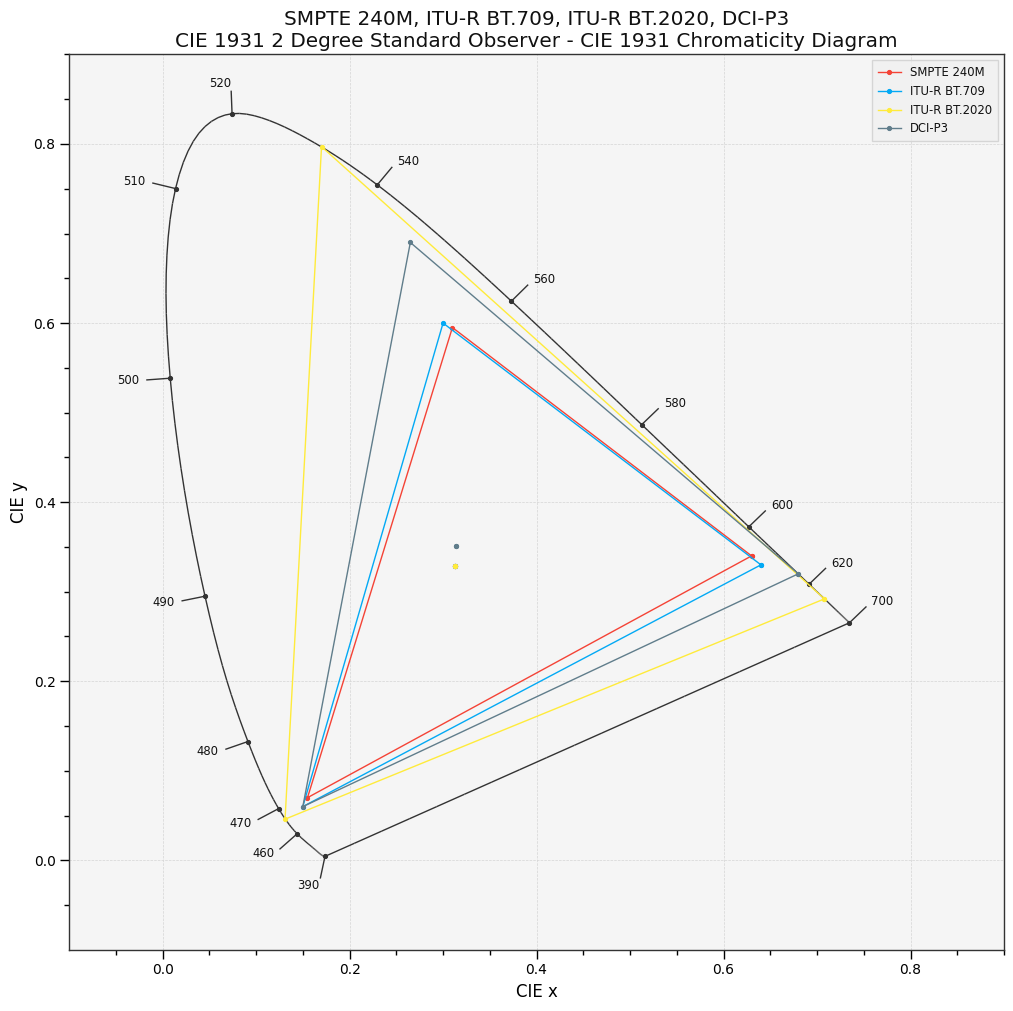

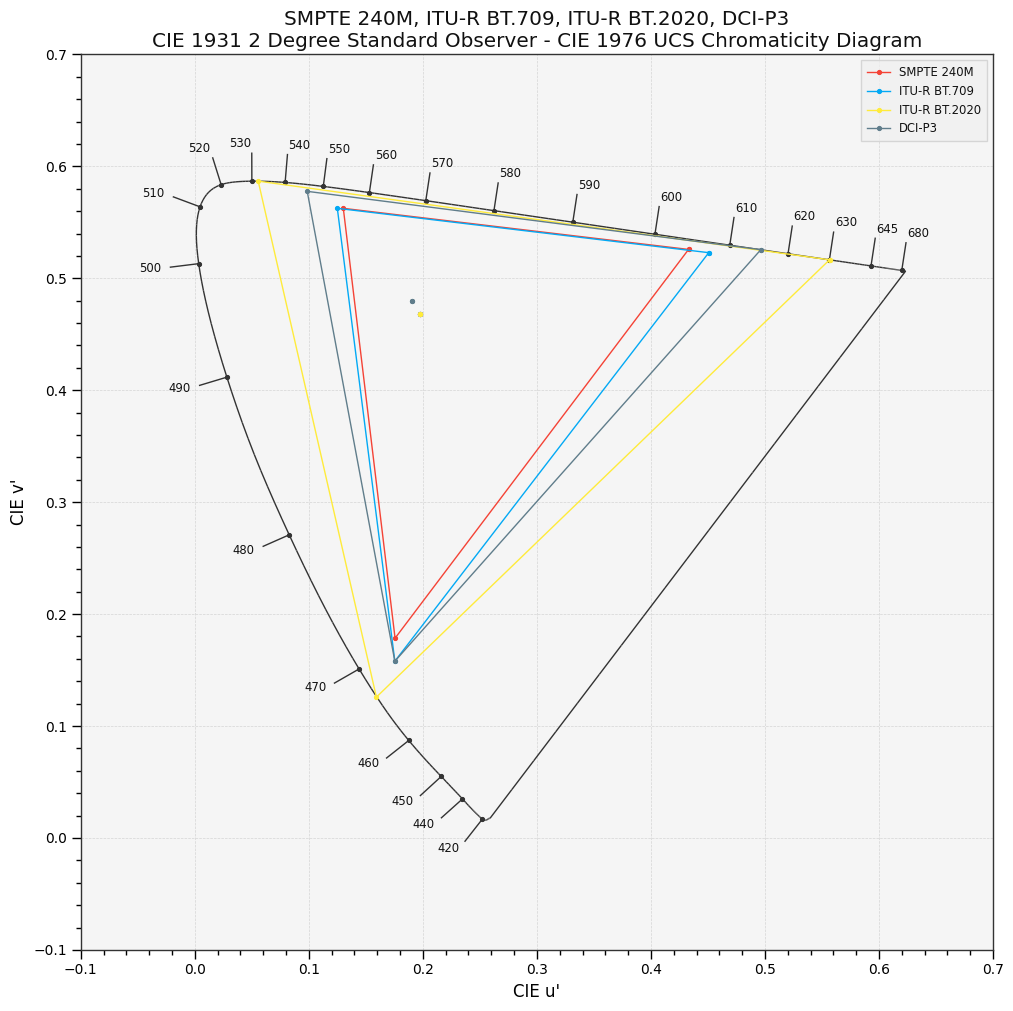

(<Figure size 1024x1024 with 1 Axes>,
 <AxesSubplot:title={'center':'SMPTE 240M, ITU-R BT.709, ITU-R BT.2020, DCI-P3\nCIE 1931 2 Degree Standard Observer - CIE 1976 UCS Chromaticity Diagram'}, xlabel="CIE u'", ylabel="CIE v'">)

In [13]:
standardspaces = [
    'SMPTE 240M',
    'ITU-R BT.709',
    'ITU-R BT.2020',
    'DCI-P3'
]

# todo: figure out how to drop the opacity of the diagram colours to make it easier to see the gamut bounds
plot_RGB_colourspaces_in_chromaticity_diagram_CIE1931(standardspaces, show_diagram_colours=False)
plot_RGB_colourspaces_in_chromaticity_diagram_CIE1976UCS(standardspaces, show_diagram_colours=False)

In [9]:
colour.RGB_COLOURSPACES['ROE BO3'] = colour.RGB_Colourspace(
    'ROE BO3', # label
    primaries=np.array(
        [[0.6897, 0.3096],
         [0.1557, 0.7379],
         [0.1287, 0.0701]]),
    whitepoint=np.array([0.3229, 0.3210]))  # yapf: disable

standardspaces = [
    'ROE BO3',
    'ITU-R BT.709',
    'ITU-R BT.2020',
    'DCI-P3'
]

# todo: figure out how to drop the opacity of the diagram colours to make it easier to see the gamut bounds
plot_RGB_colourspaces_in_chromaticity_diagram_CIE1931(standardspaces, show_diagram_colours=False)
plot_RGB_colourspaces_in_chromaticity_diagram_CIE1976UCS(standardspaces, show_diagram_colours=False)

NameError: name 'colour' is not defined